## Importación de librerías

In [2]:
# Data processing  
# -----------------------------------------------------------------------  
import numpy as np  
import pandas as pd  

# Other objectives  
# -----------------------------------------------------------------------  
import math  

# Graphics  
# -----------------------------------------------------------------------  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 

# Curstom functions 
# ----------------------------------------------------------------------- 
from src.support_eda import plot_categoric_distribution, plot_correlation_matrix, plot_numeric_distribution, plot_relation_tv_numeric, plot_outliers  

## Carga de datos

In [3]:
df = pd.read_csv('../data/raw/autorenew.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


### Fechas

Primero, convertimos las fechas a formato `datetime`

Tenemos 2 opciones:

* Cargar el conjunto de datos parseando las fechas directamente:

```python
df = pd.read_csv('../data/raw/autorenew.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
```

* Convertir manualmente las columnas de fecha:

```python
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          237765 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerCV              371528 non-null  float64       
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

### Columnas del dataset

- ``dateCrawled``: Fecha y hora en la que se recopilaron los datos del coche.

- ``name``: Nombre del anuncio, normalmente incluye la marca y el modelo del coche.

- ``seller``: Tipo de vendedor (particular o concesionario).

- ``offerType``: Tipo de oferta (venta o subasta).

- ``price``: Precio del coche en la moneda local (probablemente euros o dólares).

- ``abtest``: Campo utilizado para pruebas A/B, indica diferentes versiones del sitio web o del anuncio.

- ``vehicleType``: Tipo de vehículo (sedán, SUV, compacto, etc.).

- ``yearOfRegistration``: Año en el que se matriculó el coche.

- ``gearbox``: Tipo de transmisión (manual o automática).

- ``powerCV``: Potencia del coche en caballos de vapor (CV).

- ``model``: Modelo específico del coche.

- ``kilometer``: Kilometraje total del coche.

- ``monthOfRegistration``: Mes en el que se matriculó el coche.

- ``fuelType``: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- ``brand``: Marca del coche.

- ``notRepairedDamage``: Indica si el coche tiene daños sin reparar.

- ``dateCreated``: Fecha en la que se creó el anuncio.

- ``nrOfPictures``: Número de fotos en el anuncio.

- ``postalCode``: Código postal de la ubicación del coche.

- ``lastSeen``: Última fecha y hora en la que se visualizó el anuncio.

### Análisis de fechas

Comprobemos los valores únicos de los años para ver el intervalo de tiempo con el que estamos tratando (también podemos hacer un `.min()` o `.max()`)

In [6]:
dates = ['dateCrawled', 'dateCreated', 'lastSeen']

for date in dates:
    print(f"Unique year values for {date}: {df[date].dt.year.unique().tolist()}")

Unique year values for dateCrawled: [2016]
Unique year values for dateCreated: [2016, 2015, 2014]
Unique year values for lastSeen: [2016]


Vemos que los datos se extrajeron exclusivamente en 2016, mientras que los anuncios son únicamente de entre 2014 y 2016. Por lo tanto, asumiremos simplemente que los vehículos más nuevos solo pueden ser de 2016, en lugar del año actual. Más allá de eso, estas columnas no aportan valor adicional, así que las eliminaremos.

In [7]:
df.drop(columns=['dateCrawled', 'dateCreated', 'lastSeen'], inplace=True)

## Duplicados

Ahora que hemos eliminado las fechas, comprobemos los duplicados. Es posible que un mismo vehículo haya sido registrado múltiples veces en diferentes fechas.

In [8]:
df.duplicated().sum()

np.int64(4380)

Efectivamente tenemos duplicados, vamos a eliminarlos

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

## Nulos

Comprobemos el total de nulos que tenemos en nuestro conjunto de datos

In [11]:
nulos = df.isna().sum() 

# Podemos mostrar solo las columnas con nulos
nulos[nulos>0]

vehicleType          132233
gearbox               19946
model                 20374
fuelType              33208
notRepairedDamage     71256
dtype: int64

Para ver si son muchos o pocos, veamos el porcentaje.

In [12]:
nulos_porc = df.isna().mean() * 100

nulos_porc[nulos_porc>0].round(2)

vehicleType          36.02
gearbox               5.43
model                 5.55
fuelType              9.04
notRepairedDamage    19.41
dtype: float64

Vemos que tenemos pocas columnas con valores nulos, de las cuales:

* `gearbox` y `model`: apenas es un 5%, pocos nulos

* `fuelType`: un 9%, pocos nulos

* `notRepairedDamage`: un 19% de nulos, cantidad moderada

* `vehicleType`: un 36%, cantidad alta

Deberemos gestionar adecuadamente los nulos, especialmente de columnas críticas como `notRepairedDamage`.

## Variables numéricas

In [13]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,367148.0,17427.03,3609291.84,0.0,1150.0,2950.0,7150.0,2.147484e+09
yearOfRegistration,367148.0,2004.58,93.42,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,367148.0,113.89,190.47,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,367148.0,125700.64,40075.02,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,367148.0,5.73,3.71,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,367148.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,367148.0,50919.29,25771.17,1067.0,30629.0,49661.0,71638.0,9.999800e+04


**Observaciones rápidas:**

- **``price``**: El precio mínimo es 0, lo cual es extraño, ya que un coche gratis no tiene sentido. Además, la media es mucho mayor que la mediana, lo que podría indicar la presencia de numerosos valores atípicos, posiblemente vehículos de lujo. Sin embargo, el precio máximo alcanza un orden de magnitud de 1e9 (mil millones), lo cual es claramente imposible y probablemente se deba a errores.

- **``yearOfRegistration``**: El valor mínimo es 1000, lo cual es ilógico, ya que los coches no existían antes de 1900 (y los vehículos tan antiguos rara vez se venden). Además, hay valores como 9999, que probablemente sean errores de introducción de datos.

- **``powerCV``**: Un valor mínimo de 0 es poco probable, y un máximo de 19.700 CV es irreal, dado que incluso los coches de carreras más potentes rara vez superan los 1.000 CV. El resto de valores parecen razonables, con la mayoría situándose en el rango típico de entre 50 y 150 CV.

- **``kilometer``**: Estos valores parecen razonables. Además, la media y la mediana son similares, lo que sugiere una distribución más uniforme.

- **``monthOfRegistration``**: Esta variable es verdaderamente categórica. El valor mínimo, 0, es imposible, pero los valores entre 1 y 12 son lógicos y coherentes.

- **``nrOfPictures``**: Todas las entradas tienen un valor de 0. La eliminamos.

- **``postalCode``**: Esta variable corresponde a códigos postales y podría tratarse como categórica. Sin embargo, no hay información sobre el país al que pertenecen ni una forma de determinarlo, lo que limita su utilidad para el análisis. Por el nombre de algunas entradas, sospechamos que podría ser Alemania, pero no hay forma de confirmarlo. Por ello, decidimos eliminarla.

In [14]:
df.drop(columns=['postalCode', 'nrOfPictures'], inplace=True)

In [15]:
columnas_numericas = df.select_dtypes(include='number').columns

In [16]:
columnas_numericas

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration'],
      dtype='object')

### Histogramas

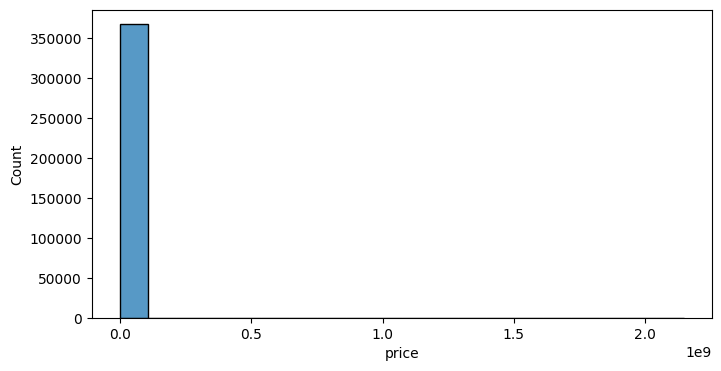

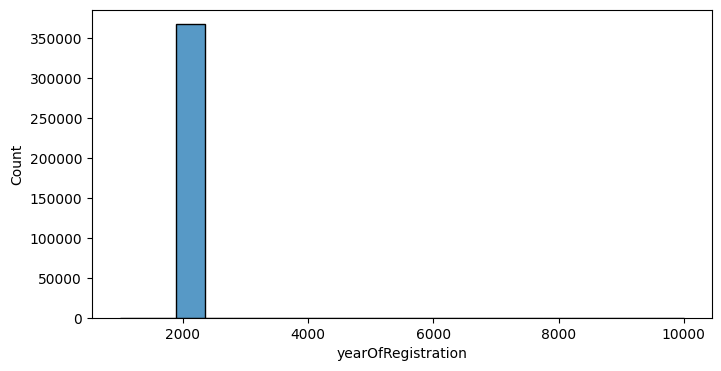

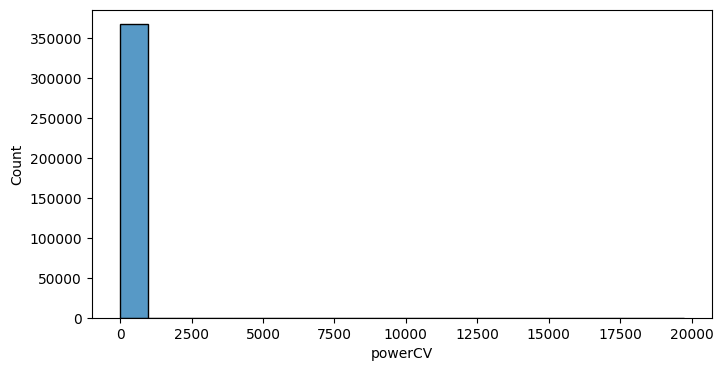

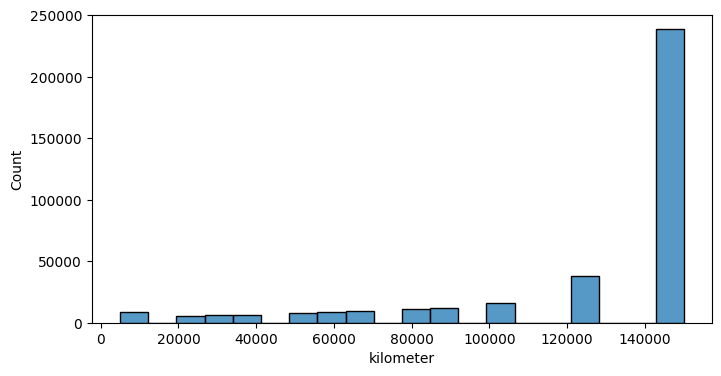

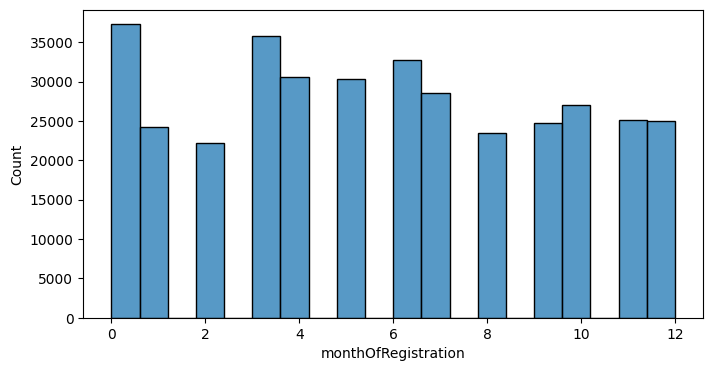

In [17]:
for columna in columnas_numericas:

    plt.figure(figsize=(8, 4))
    sns.histplot(df[columna], bins=20)
    plt.show()

### Boxplot

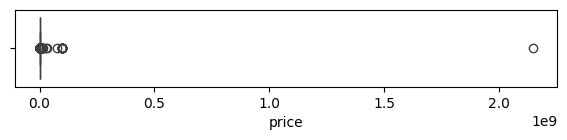

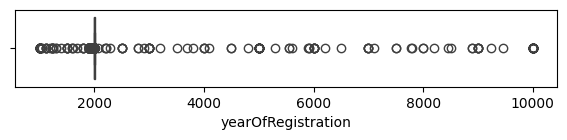

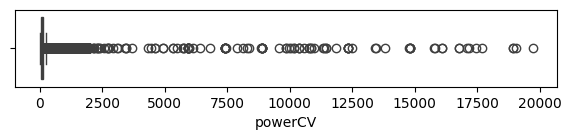

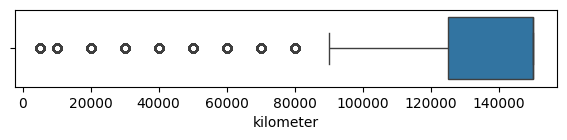

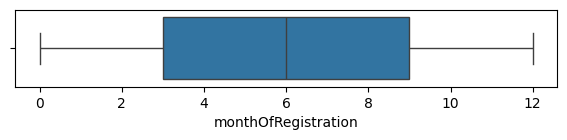

In [18]:
for columna in columnas_numericas:

    plt.figure(figsize=(7, 1))
    sns.boxplot(x=df[columna])
    plt.show()

## Variables categóricas

In [19]:
df.describe(include=['object', 'category']).T.round(2)

,count,unique,top,freq
name,367148,233531,Ford_Fiesta,654
seller,367148,2,private,367145
offerType,367148,2,offer,367136
abtest,367148,2,test,190282
vehicleType,234915,7,small car,79154
gearbox,347202,2,manually,271369
model,346774,251,golf,29716
fuelType,333940,7,petrol,221639
brand,367148,40,volkswagen,78682
notRepairedDamage,295892,2,no,259913


In [20]:
columnas_categoricas = df.select_dtypes(include=['category', 'object']).columns

columnas_categoricas

Index(['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'model', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [21]:
for columna in columnas_categoricas:

    print(f"\nValores únicos de la columna {columna}:")
    display(df[columna].value_counts(dropna=False))


Valores únicos de la columna name:


name
Ford_Fiesta                                     654
BMW_318i                                        624
Opel_Corsa                                      619
Volkswagen_Golf_1.4                             601
BMW_316i                                        521
                                               ... 
Golf_3_1.6__Tuev_bis_11/17                        1
Opel_Frontera_A_Sport_2_0                         1
KIA_Picanto_mit_TÜV_neu                           1
Seat_Alhambra_Familien_Van                        1
BMW_M135i_vollausgestattet_NP_52.720____Euro      1
Name: count, Length: 233531, dtype: int64


Valores únicos de la columna seller:


seller
private       367145
commercial         3
Name: count, dtype: int64


Valores únicos de la columna offerType:


offerType
offer      367136
request        12
Name: count, dtype: int64


Valores únicos de la columna abtest:


abtest
test       190282
control    176866
Name: count, dtype: int64


Valores únicos de la columna vehicleType:


vehicleType
NaN            132233
small car       79154
combi           66687
bus             29813
convertible     22715
coupe           18861
suv             14351
other            3334
Name: count, dtype: int64


Valores únicos de la columna gearbox:


gearbox
manually     271369
automatic     75833
NaN           19946
Name: count, dtype: int64


Valores únicos de la columna model:


model
golf               29716
andere             26197
3er                20399
NaN                20374
polo               12989
                   ...  
kalina                 8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: count, Length: 252, dtype: int64


Valores únicos de la columna fuelType:


fuelType
petrol     221639
diesel     105822
NaN         33208
lpg          5329
cng           565
hybrid        275
other         207
electro       103
Name: count, dtype: int64


Valores únicos de la columna brand:


brand
volkswagen        78682
bmw               39796
opel              39628
mercedes_benz     34879
audi              32359
ford              25254
renault           17787
peugeot           10890
fiat               9584
seat               6955
mazda              5630
skoda              5580
smart              5213
citroen            5144
nissan             4981
toyota             4641
sonstige_autos     3951
hyundai            3614
mini               3361
volvo              3273
mitsubishi         3036
honda              2814
kia                2514
alfa_romeo         2319
suzuki             2309
porsche            2195
chevrolet          1828
chrysler           1442
dacia               895
jeep                801
daihatsu            796
subaru              777
land_rover          766
jaguar              616
trabant             586
daewoo              536
saab                524
rover               486
lancia              482
lada                224
Name: count, dtype: int64


Valores únicos de la columna notRepairedDamage:


notRepairedDamage
no     259913
NaN     71256
yes     35979
Name: count, dtype: int64

### Countplot

Columna name con demasiados valores únicos: 233531
Distribución de la columna seller


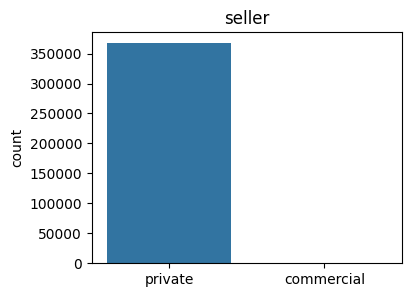

Distribución de la columna offerType


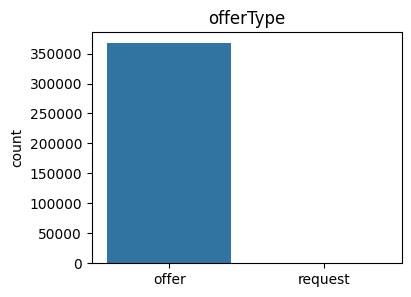

Distribución de la columna abtest


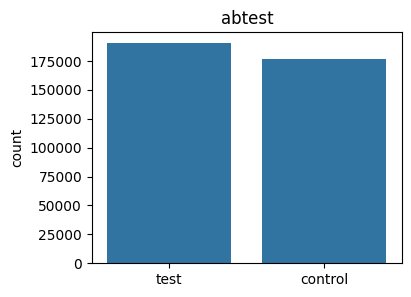

Distribución de la columna vehicleType


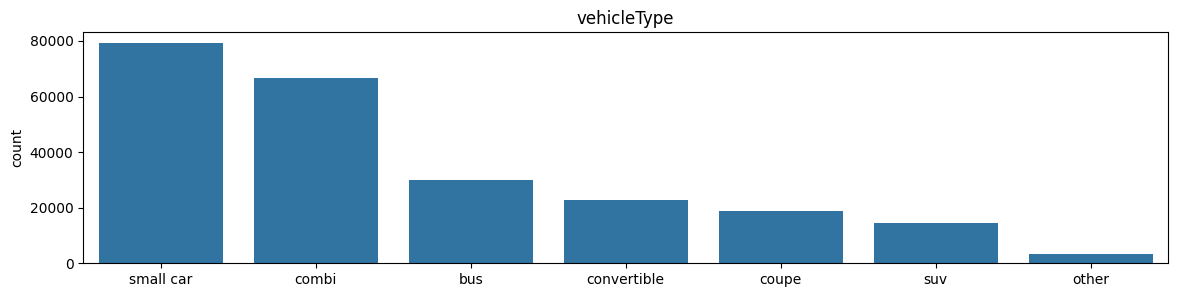

Distribución de la columna gearbox


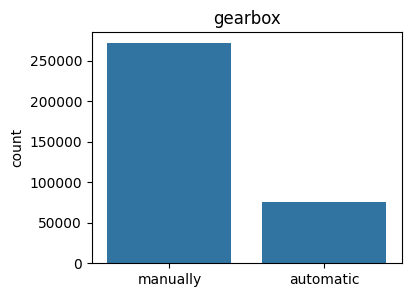

Distribución de la columna model


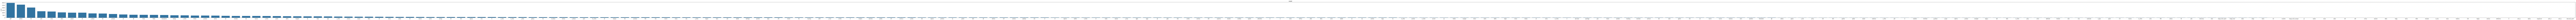

Distribución de la columna fuelType


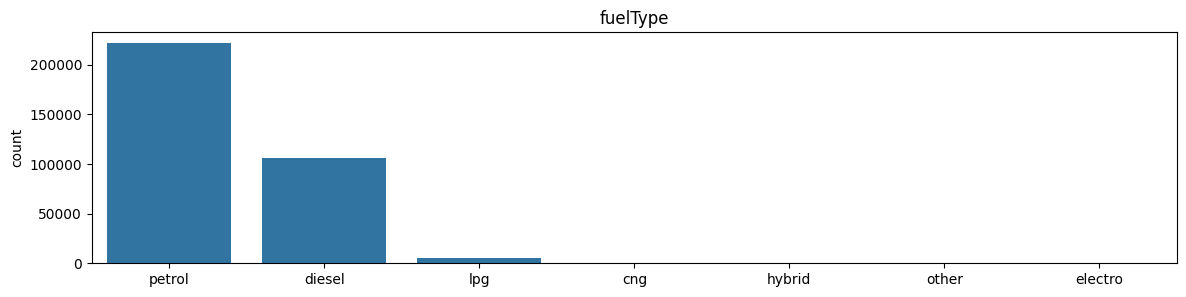

Distribución de la columna brand


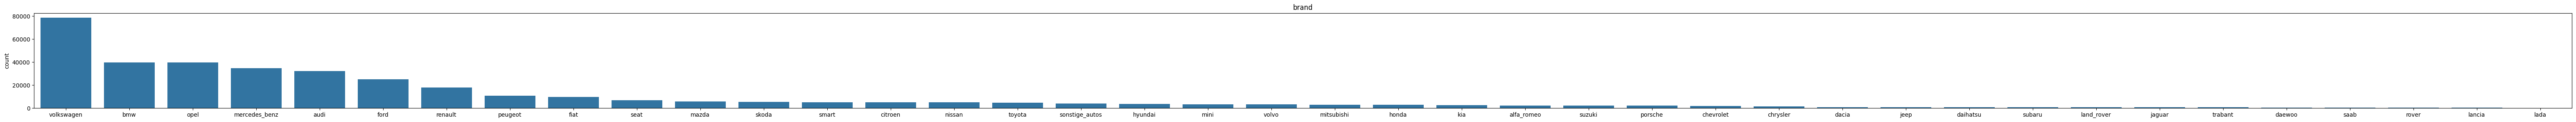

Distribución de la columna notRepairedDamage


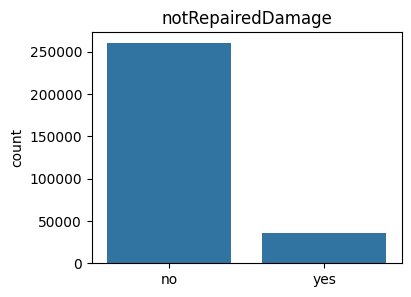

In [31]:
for columna in columnas_categoricas:

    n_cat = df[columna].nunique()

    if n_cat > 300:
        print(f"Columna {columna} con demasiados valores únicos: {n_cat}")
        continue

    print(f"Distribución de la columna {columna}")
    plt.figure(figsize=(n_cat * 2, 3))
    sns.countplot(x=df[columna], order=df[columna].value_counts().index)
    plt.title(columna)
    plt.xlabel('')
    plt.show()

---

## Esto es limpieza realmente

---

### `yearOfRegistration`

The registration year cannot be later than 2016, which is the latest year of data extraction. However, let's check the entries for subsequent years as well.

In [16]:
df[df['yearOfRegistration'] > 2016]['yearOfRegistration'].value_counts().head()

yearOfRegistration
2017    9855
2018    3766
2019      15
9999      14
5000      14
Name: count, dtype: int64

We see that we have quite a few entries in 2017 and 2018, so we will keep them, as it might be realistic that data extraction took place in those years. The remaining values are less frequent, so we can assume they are errors and label them as null.

Let's see what happens with vehicles with older registration years. For example, let's check how many vehicles are older than 1930.

In [17]:
df[df['yearOfRegistration'] < 1930]['yearOfRegistration'].value_counts().head()

yearOfRegistration
1910    35
1000    23
1929     7
1800     3
1234     3
Name: count, dtype: int64

There are 36 entries from 1910 that likely represent errors. Let's visualize the distribution graphically.

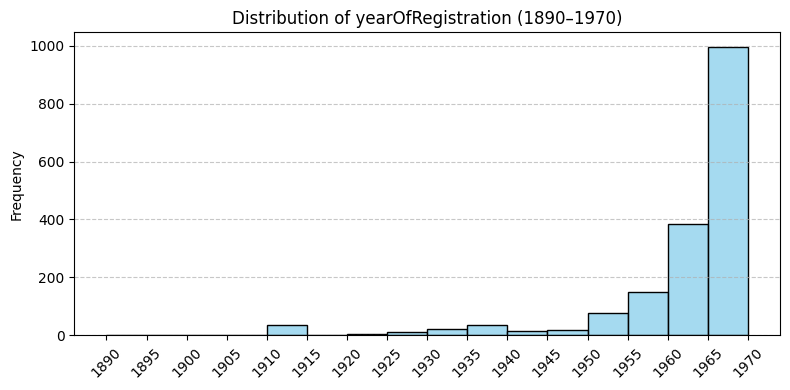

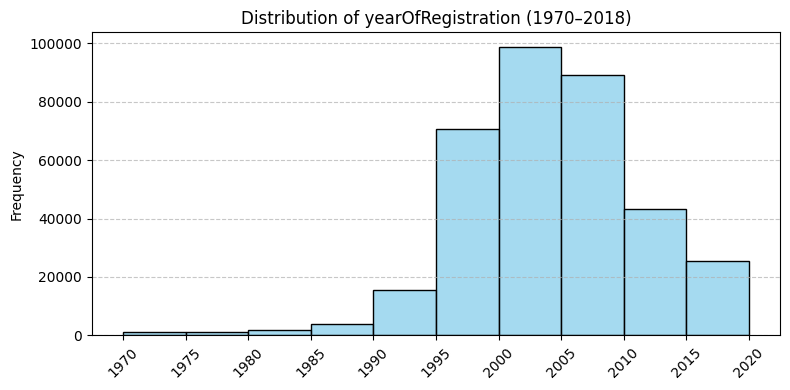

In [18]:
plot_numeric_distribution(df, 1890, 1970, 'yearOfRegistration', n=5, size=(8,4))
plot_numeric_distribution(df, 1970, 2018, 'yearOfRegistration', n=5, size=(8,4))

That group from 1910 clearly stands out, so we will treat entries prior to 1920 as null.

We apply the filters by converting the year values to null.

In [19]:
df['yearOfRegistration'] = df['yearOfRegistration'].apply(lambda x: np.nan if (x < 1920 or x > 2018) else x)

---

### `powerCV`

A vehicle with more than 1200 HP practically doesn't exist, so let's examine what happens with high power values up to this threshold. We'll consider the range from 500 to 1200. Values above 1200 will be directly converted to null.

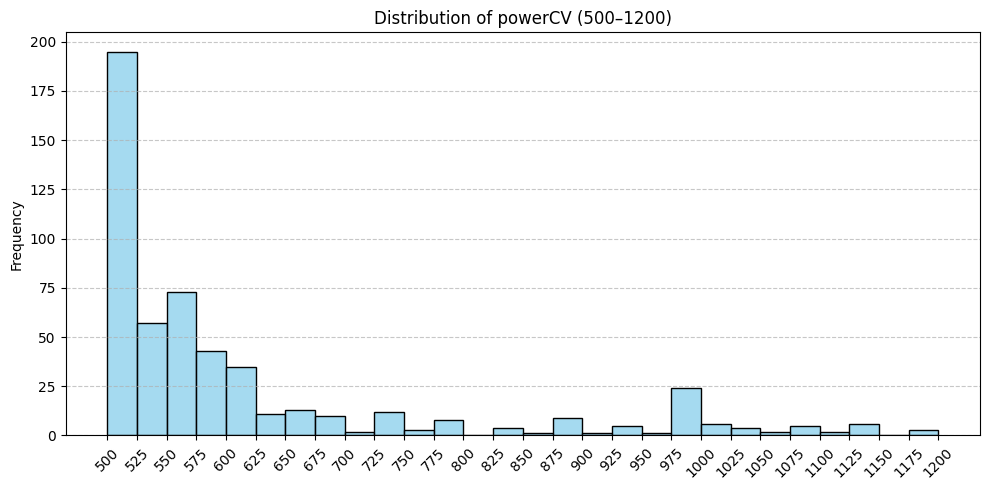

In [20]:
plot_numeric_distribution(df, 500, 1200, 'powerCV', n = 25)

In [21]:
df[(df['powerCV'] > 500) & (df['powerCV'] < 1200)].sample(5)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
323873,Mercedes_Benz_CL_500,private,offer,16500,control,coupe,2000.0,automatic,501.0,cl,50000,3,petrol,mercedes_benz,yes
160001,Chevrolet_Matiz_BJ_2005__ohne_TÜV_,private,offer,500,test,small car,2005.0,manually,576.0,matiz,125000,0,petrol,chevrolet,NaN
91730,Mercedes_V58K_Vaeth_AMG,private,offer,39500,control,NaN,2005.0,automatic,620.0,c_klasse,100000,3,petrol,mercedes_benz,no
95109,Lamborghini_Gallardo_LP_550_2,private,offer,135500,test,convertible,2013.0,NaN,543.0,NaN,20000,7,petrol,sonstige_autos,no
258560,Citroën_C2_VTR,private,offer,2400,control,small car,2004.0,manually,733.0,c2,125000,0,NaN,citroen,NaN


We observe that from 500 onward, the frequency of vehicles decreases significantly. However, it is difficult to establish an appropriate criterion to discern whether the values make sense, as some are clearly erroneous while others correspond to genuinely powerful vehicles. We'll set the cutoff at 1200.

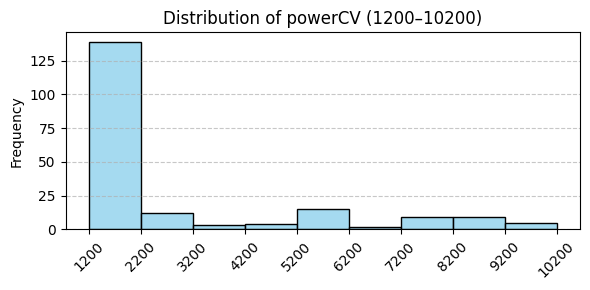

In [22]:
plot_numeric_distribution(df, 1200, 10200, 'powerCV', n = 1000, size=(6, 3))

We see that above 1200, there are very few entries compared to the total dataset, so we convert them to null without issue.

Regarding the lower range, vehicles with lower power that make sense can go down to 50 HP. Let's set the threshold at 40 HP to allow for the possibility of classic or very old vehicles that may have less power.

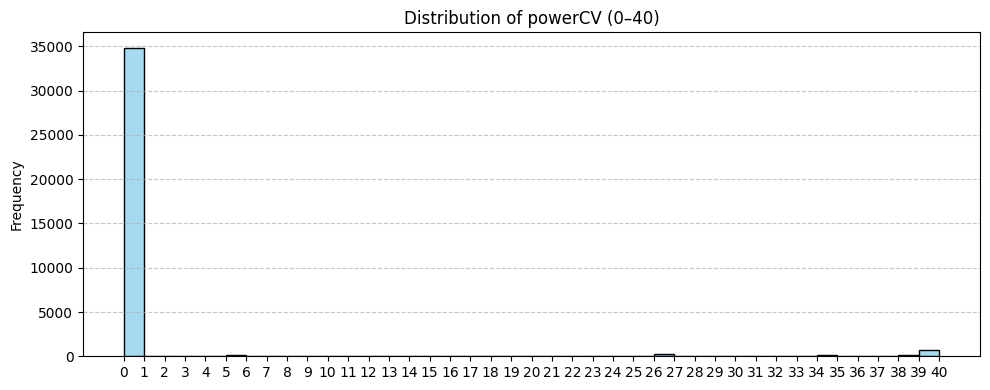

In [23]:
plot_numeric_distribution(df, 0, 40, 'powerCV', n = 1, size=(10,4), rotation=0)

We see that the vast majority of values are 0. Obviously, these entries are incorrect, so we will nullify them. Likewise, we can review what happens within this range of power values.

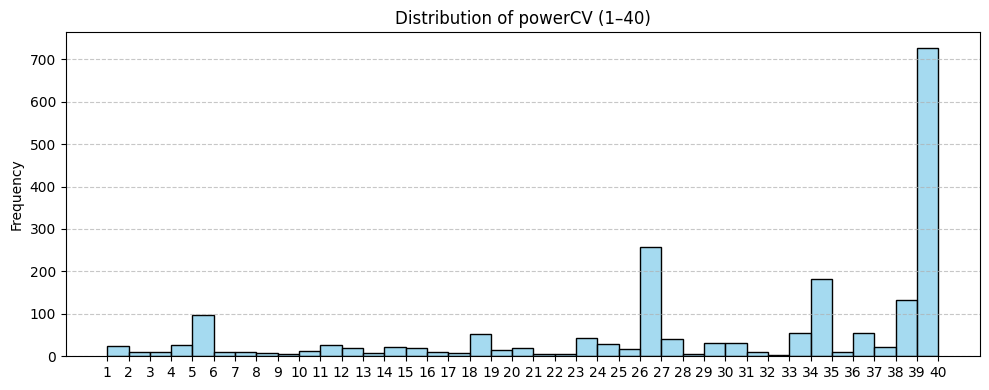

In [24]:
plot_numeric_distribution(df, 1, 40, 'powerCV', n = 1, size=(10,4), rotation=0)

Indeed, we confirm that from 40 HP onwards, there is a significant number of values.

In [25]:
df[(df['powerCV'] < 40) & (df['powerCV'] > 0)].sample(5)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
166325,Trabant_601,private,offer,5999,test,convertible,1977.0,manually,26.0,601,60000,7,petrol,trabant,no
257171,##_Seat_Marbella_ohne_Papiere_25KM/H_Mofa_Auto...,private,offer,550,test,small car,1998.0,manually,34.0,andere,80000,6,petrol,seat,no
128266,Trabant_601_1964_Survivor_Oldtimer,private,offer,3999,test,NaN,1964.0,manually,23.0,601,50000,11,petrol,trabant,NaN
310533,Bmw_1er_118i_4/5_tuerer,private,offer,5900,test,NaN,2017.0,manually,1.0,1er,125000,5,petrol,bmw,no
242302,Aixam__mega_400__Leicht_KFZ__45_km/h__ab_16__M...,private,offer,1500,test,other,1998.0,automatic,5.0,NaN,40000,5,diesel,sonstige_autos,no


We also confirm that most of these entries do not seem to make sense, so we will treat them as null.

In [26]:
df['powerCV'] = df['powerCV'].apply(lambda x: np.nan if (x < 40 or x > 1200) else x)

---

###  `kilometer`

The `kilometer` variable should be continuous numerical. However, the data seems to be grouped into discrete mileage intervals, such as multiples of 5000 or 10000 kilometers. This makes sense, as it is common in used car ads to categorize mileage in rounded values.

Grouping the data this way introduces a bias and can distort the perception of the actual mileage of the cars. Unfortunately, we do not have access to more detailed information, so we will proceed with this as is.

In [27]:
df['kilometer'].value_counts()

kilometer
150000    228495
125000     36721
100000     15094
90000      12095
80000      10696
70000       9544
60000       8381
50000       7418
40000       6178
30000       5776
20000       5398
5000        5369
10000       1814
Name: count, dtype: int64

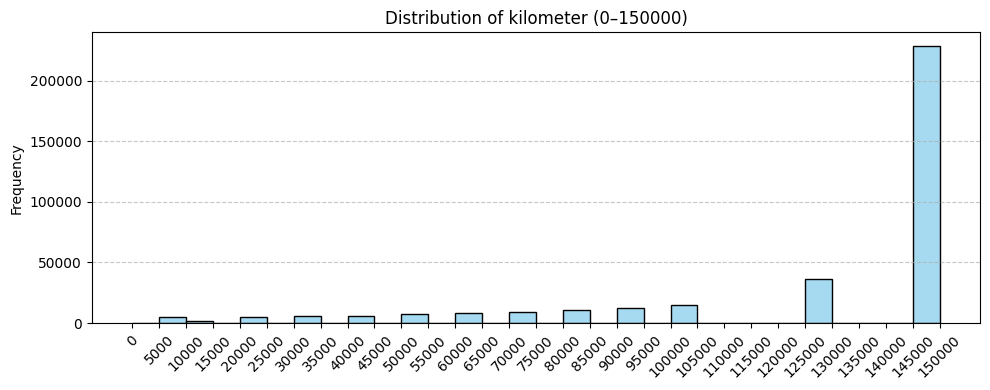

In [28]:
plot_numeric_distribution(df, 0, 150000, 'kilometer', n = 5000, size = (10, 4))

Since all these values are reasonable, we will not add any additional filters.

---

### `monthOfRegistration`

In [29]:
df['monthOfRegistration'].value_counts()

monthOfRegistration
3     35007
6     31914
0     31201
4     29870
5     29514
7     27956
10    26421
11    24612
12    24336
9     24163
1     23529
8     22859
2     21597
Name: count, dtype: int64

We have values from 0 to 12. These correspond to the vehicle's registration month, except for 0, which we can interpret as unknown.

This variable is essentially categorical, so we will convert it to an object.

In [30]:
df['monthOfRegistration'] = df['monthOfRegistration'].astype(object)

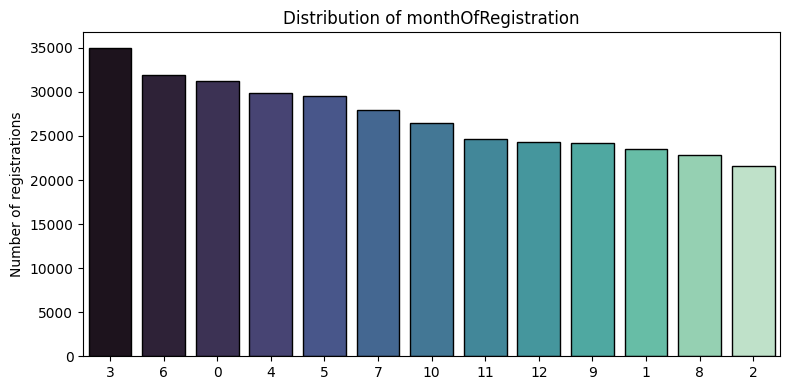

In [31]:
plot_categoric_distribution(df, 'monthOfRegistration', rotation=0)

It seems that some months are more frequent than others, although the differences are not significant. Since the main information about the temporal evolution of the vehicle's registration is captured in `yearOfRegistration`, we can ignore this category for now.

In [32]:
df.drop(columns='monthOfRegistration', inplace=True)

---

## Categorical data

In [33]:
df.describe(include='O').T

,count,unique,top,freq
name,352979,222118,BMW_318i,624
seller,352979,2,private,352977
offerType,352979,2,offer,352973
abtest,352979,2,test,182845
vehicleType,228375,7,small car,76392
gearbox,336758,2,manually,262574
model,335413,251,golf,28534
fuelType,324641,7,petrol,214353
brand,352979,40,volkswagen,75426
notRepairedDamage,288969,2,no,255922


---

### `name`

We have many different entries for `name`, so it doesn't really provide much useful information for building a predictive price model. Information such as the model and brand is stored in other variables.

In [34]:
df.drop(columns='name', inplace=True)

---

### `seller`

In [35]:
df['seller'].value_counts()

seller
private       352977
commercial         2
Name: count, dtype: int64

There are two types of `seller`: `private` and `commercial`. However, out of more than 350,000 entries, only 2 are `commercial`, so this column does not provide useful information. We will remove it as well.

In [36]:
df.drop(columns='seller', inplace=True)

---

### `offerType`

In [37]:
df['offerType'].value_counts()

offerType
offer      352973
request         6
Name: count, dtype: int64

There are two types of `offerType`: `offer` and `request`. However, out of more than 350,000 entries, only 6 are `request`, so this column does not provide useful information. We will remove it as well.

In [38]:
df.drop(columns='offerType', inplace=True)

---

### `abtest`

Initially, this field is used for an A/B test, but we are not entirely sure of its real purpose. We might be able to remove it, but first, let's check some key metrics.

In [39]:
df.groupby('abtest')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
abtest,,,,,,,,
control,170134.0,6083.27,16864.48,101.0,1299.0,3100.0,7499.0,2995000.0
test,182845.0,6160.32,19649.56,101.0,1299.0,3100.0,7499.0,3895000.0


The group sizes are very similar, and the median price for each group is identical, as are the quartiles. The mean and standard deviation are affected by outliers, so the differences are not particularly significant.

We conclude that we can also dispense with this column.

In [40]:
df.drop(columns='abtest', inplace=True)

---

### `vehicleType`

In [41]:
df['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

We start converting `nan` to `unknown`

In [42]:
df['vehicleType'].fillna('unkonwn', inplace=True)

In [43]:
df['vehicleType'].value_counts()

vehicleType
unkonwn        124604
small car       76392
combi           64925
bus             29298
convertible     22324
coupe           18233
suv             14117
other            3086
Name: count, dtype: int64

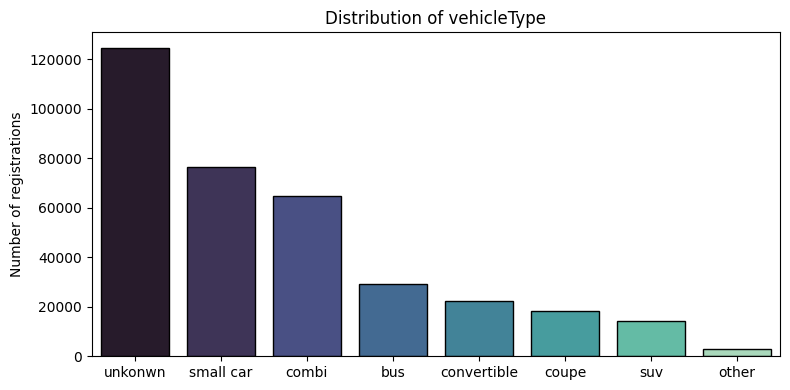

In [44]:
plot_categoric_distribution(df, 'vehicleType', rotation=0)

Quick insights:

* `small car` are compact and practical, dominating the market due to their affordability and suitability for city driving. 

* `combis` are versatile family vehicles, popular for their space and functionality. 

* `bus` serve collective transportation needs with moderate demand. However, after inspecting some individual data, it only appears to be vans rather than buses.

* `convertible` and `coupe` cater to style and leisure enthusiasts, while `suv` appeal to those needing space and off-road capability. 

* `other` vehicles may represent niche or specialized types with limited presence. 

* `unkonwn` vehicles represent vehicles with no category information. 

Overall, practicality and versatility drive the majority of demand.

---

### `gearbox`

In [45]:
df['gearbox'].unique()

array(['manually', 'automatic', nan], dtype=object)

We start converting `nan` to `unknown`

In [46]:
df['gearbox'].fillna('unkonwn', inplace=True)

In [47]:
df['gearbox'].value_counts()

gearbox
manually     262574
automatic     74184
unkonwn       16221
Name: count, dtype: int64

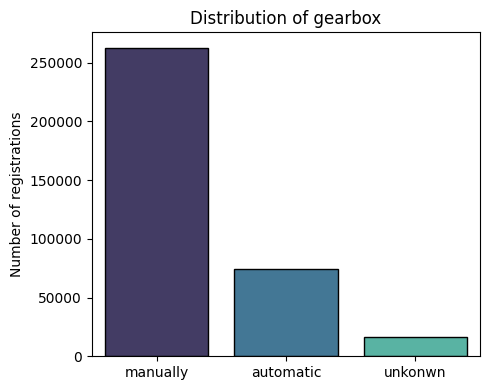

In [48]:
plot_categoric_distribution(df, 'gearbox', size=(5, 4), rotation=0)

Vehicles with manual transmission dominate over automatic ones, revealing that it is the most popular option in the market, especially for used vehicles.

---

### `model`

In [49]:
df['model'].nunique()

251

In [50]:
df['model'].value_counts()

model
golf               28534
andere             25222
3er                19704
polo               12343
corsa              11820
                   ...  
serie_2                8
rangerover             6
serie_3                3
serie_1                1
discovery_sport        1
Name: count, Length: 251, dtype: int64

With `model`, we face a similar situation as with `name`. We have 251 different models, but this information is essentially a subcategory of `brand`, so we will remove this column and keep `brand`.

In [51]:
df.drop(columns='model', inplace=True)

---

### `fuelType`

In [52]:
df['fuelType'].unique()

array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)

We start converting `nan` to `unknown`

In [53]:
df['fuelType'].fillna('unkonwn', inplace=True)

In [54]:
df['fuelType'].value_counts()

fuelType
petrol     214353
diesel     104044
unkonwn     28338
lpg          5172
cng           549
hybrid        268
other         156
electro        99
Name: count, dtype: int64

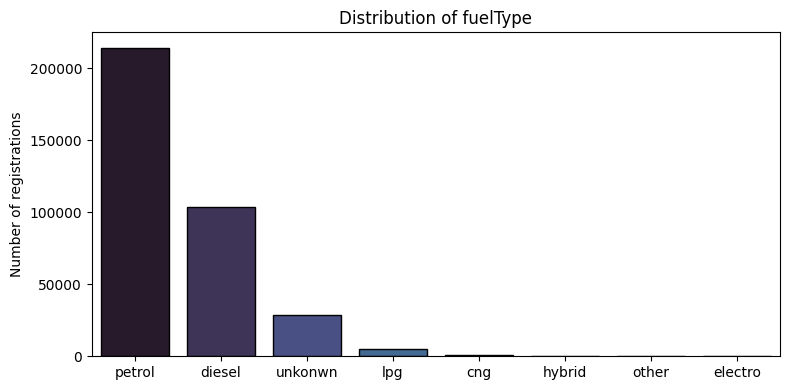

In [55]:
plot_categoric_distribution(df, 'fuelType', rotation=0)

`petrol` and `diesel` are the most popular options. This makes sense, especially in the used car market, as `hybrid` or `electro` technologies are newer and have been on the market for a shorter time.

---

### `brand`

In [56]:
df['brand'].sort_values().unique()

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant',
       'volkswagen', 'volvo'], dtype=object)

In [57]:
df['brand'].nunique()

40

There are 40 different brands. however, in German, "sonstige Autos" translates to "other cars" in English. This reinforces the possibility that the vehicles could be from Germany

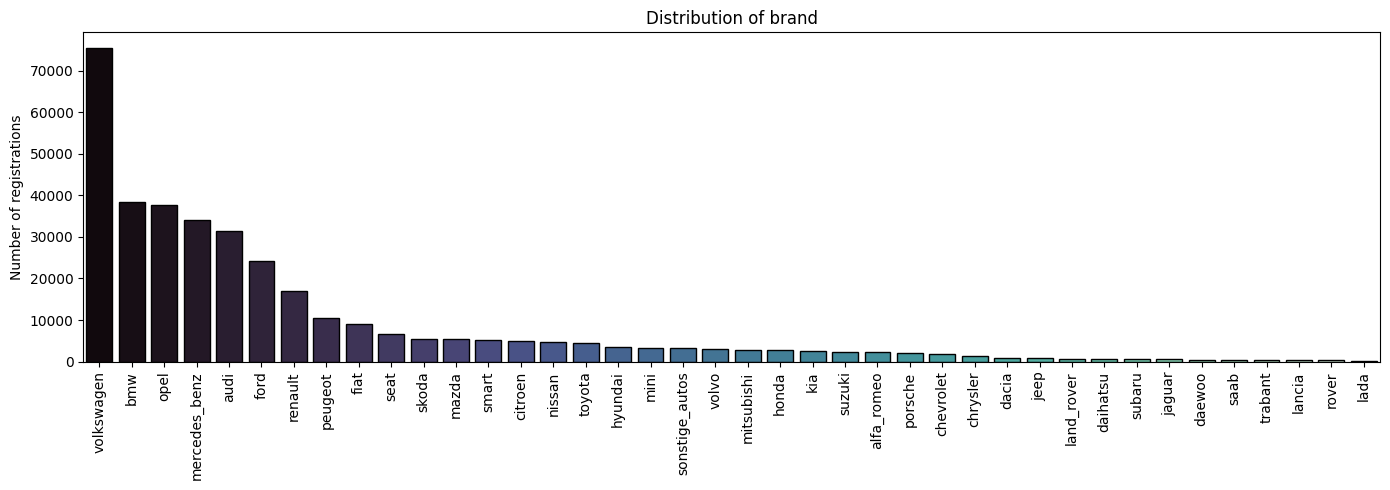

In [58]:
plot_categoric_distribution(df, 'brand', size=(14, 5), rotation=90)

`Volkswagen` clearly dominates the market. Well-known brands such as `BMW`, `Opel`, `Mercedes`, `Audi`, `Ford`, etc., follow with a more balanced distribution.

---

### `notRepairedDamage`

In [59]:
df['notRepairedDamage'].unique()

array([nan, 'yes', 'no'], dtype=object)

We start converting `nan` to `unknown`

In [60]:
df['notRepairedDamage'].fillna('unkonwn', inplace=True)

In [61]:
df['notRepairedDamage'].value_counts()

notRepairedDamage
no         255922
unkonwn     64010
yes         33047
Name: count, dtype: int64

In [62]:
df['notRepairedDamage'].value_counts(normalize=True)

notRepairedDamage
no         0.725035
unkonwn    0.181342
yes        0.093623
Name: proportion, dtype: float64

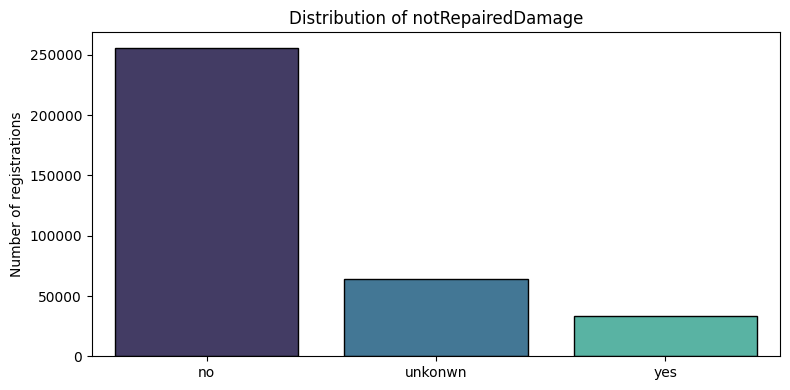

In [63]:
plot_categoric_distribution(df, 'notRepairedDamage', rotation=0)

The majority of cars (~72.5%) have no damage, with some unknown entries and a bit less than 10% of damaged cars.

---

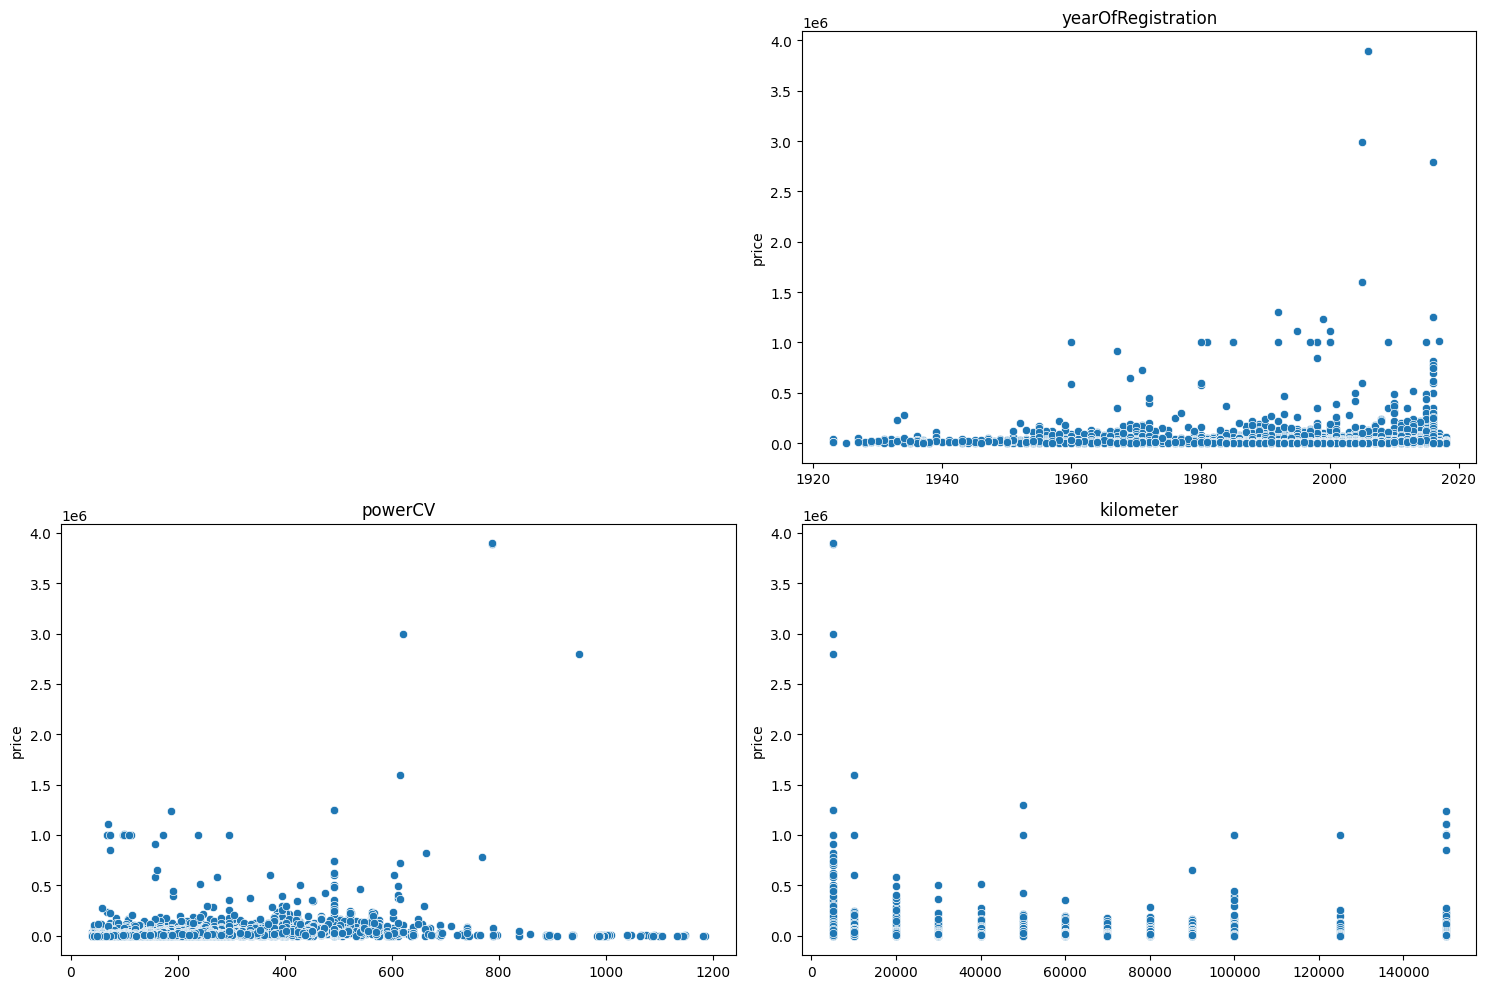

In [64]:
plot_relation_tv_numeric(df, 'price')

Apparently, we do not see any clear correlation. Let's examine the correlation coefficients.

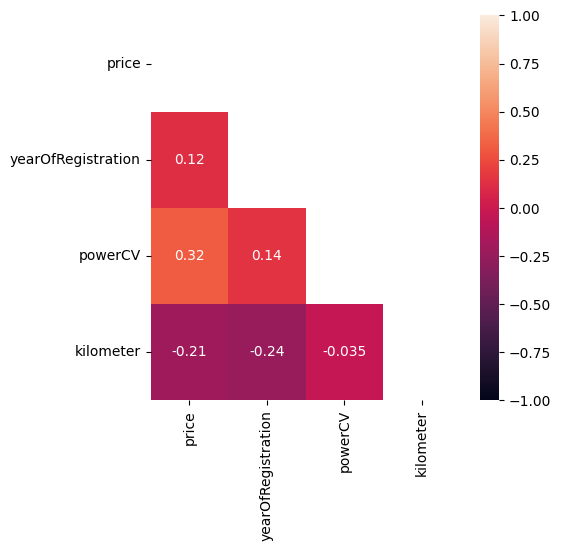

In [65]:
plot_correlation_matrix(df)

We observe a relatively moderate positive correlation between `powerCV` and `price`, which makes sense as more powerful vehicles tend to be more expensive, though other factors also play a role.

There is a weak negative correlation between `kilometer` and `price`, which is also logical since vehicles with higher mileage tend to have lower prices.

Finally, there is a weak negative correlation between `yearOfRegistration` and `kilometer`, indicating that older vehicles (with lower registration years) tend to have higher mileage, which is consistent.

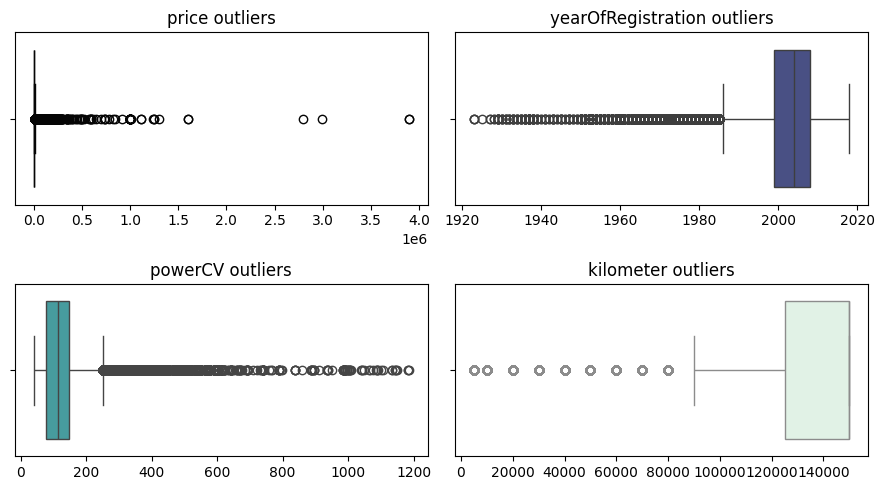

In [66]:
plot_outliers(df)

- **`price`**: Clear outliers that could correspond to luxury supercars identified earlier.  

- **`powerCV`**: Outliers are relatively evenly distributed. The distribution was better observed in the previous histograms.

- **`yearOfRegistration`**: Outliers in the oldest dates, more evenly distributed.  

- **`kilometer`**: The grouping into discrete values is noticeable.  

---

**Note**: If we examine the duplicates, we now see a large number of them. However, we will NOT remove them, as they could represent different cars with the same characteristics. Truly duplicate entries were already handled at the beginning.

In [67]:
df.duplicated().sum()

46657

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352979 entries, 0 to 371527
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price               352979 non-null  int64  
 1   vehicleType         352979 non-null  object 
 2   yearOfRegistration  352807 non-null  float64
 3   gearbox             352979 non-null  object 
 4   powerCV             316255 non-null  float64
 5   kilometer           352979 non-null  int64  
 6   fuelType            352979 non-null  object 
 7   brand               352979 non-null  object 
 8   notRepairedDamage   352979 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 26.9+ MB


We save the dataframe as a CSV file.

In [70]:
df.to_csv('../data/output/autorenew_eda.csv')